[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLOv8 Object Detection on a Custom Dataset

---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/wuZtUMEiKWY)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## ⚠️ Disclaimer

YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **03.01.2024** with version **YOLOv8.0.196**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

## Accompanying Blog Post

We recommend that you follow along in this notebook while reading the blog post on how to train YOLOv8 Object Detection, concurrently.

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv8
- CLI Basics
- Inference with Pre-trained COCO Model
- Roboflow Universe
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Sun Apr 28 18:14:41 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **03.01.2024** with version **YOLOv8.0.196**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.8/78.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## Inference with Pre-trained COCO Model

### 💻 CLI

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

## Custom Training

In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=640 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 230MB/s]
New https://pypi.org/project/ultralytics/8.2.4 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/helmet-2/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=F

In [7]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1714328345.5c0e9a6ba306.2197.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch4455.jpg  weights
P_curve.png					    train_batch4456.jpg
PR_curve.png					    train_batch4457.jpg


/content


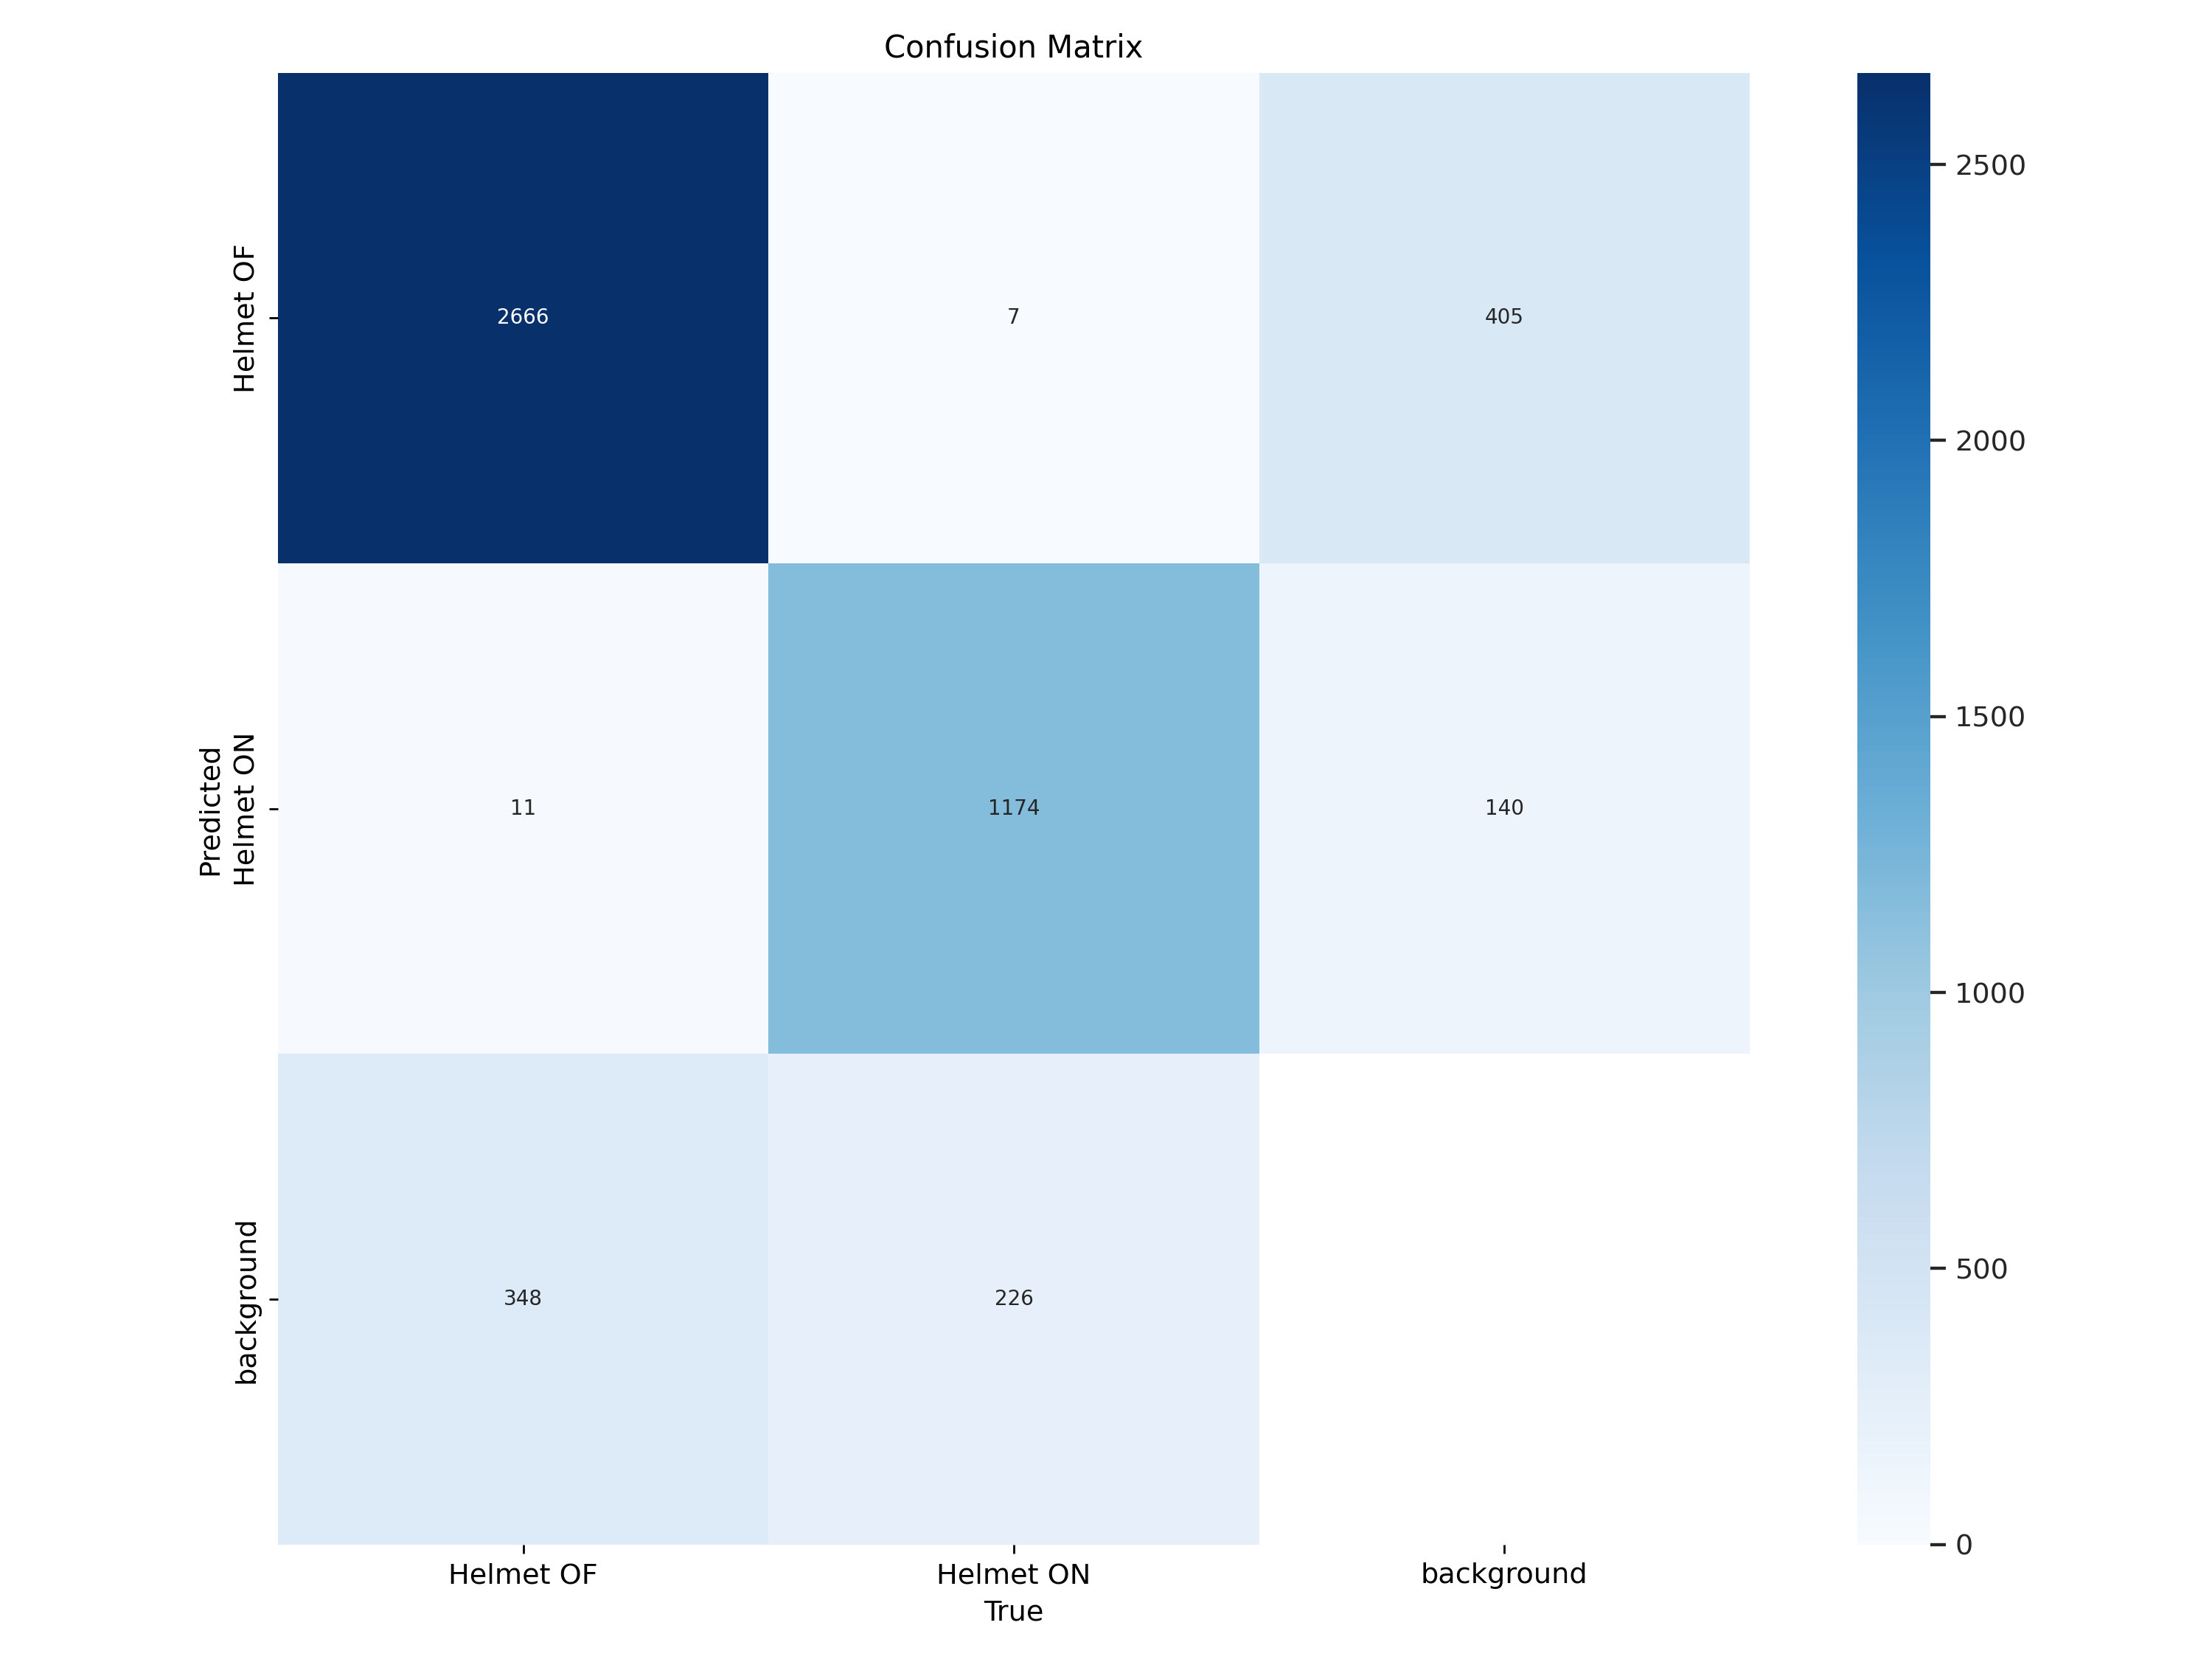

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


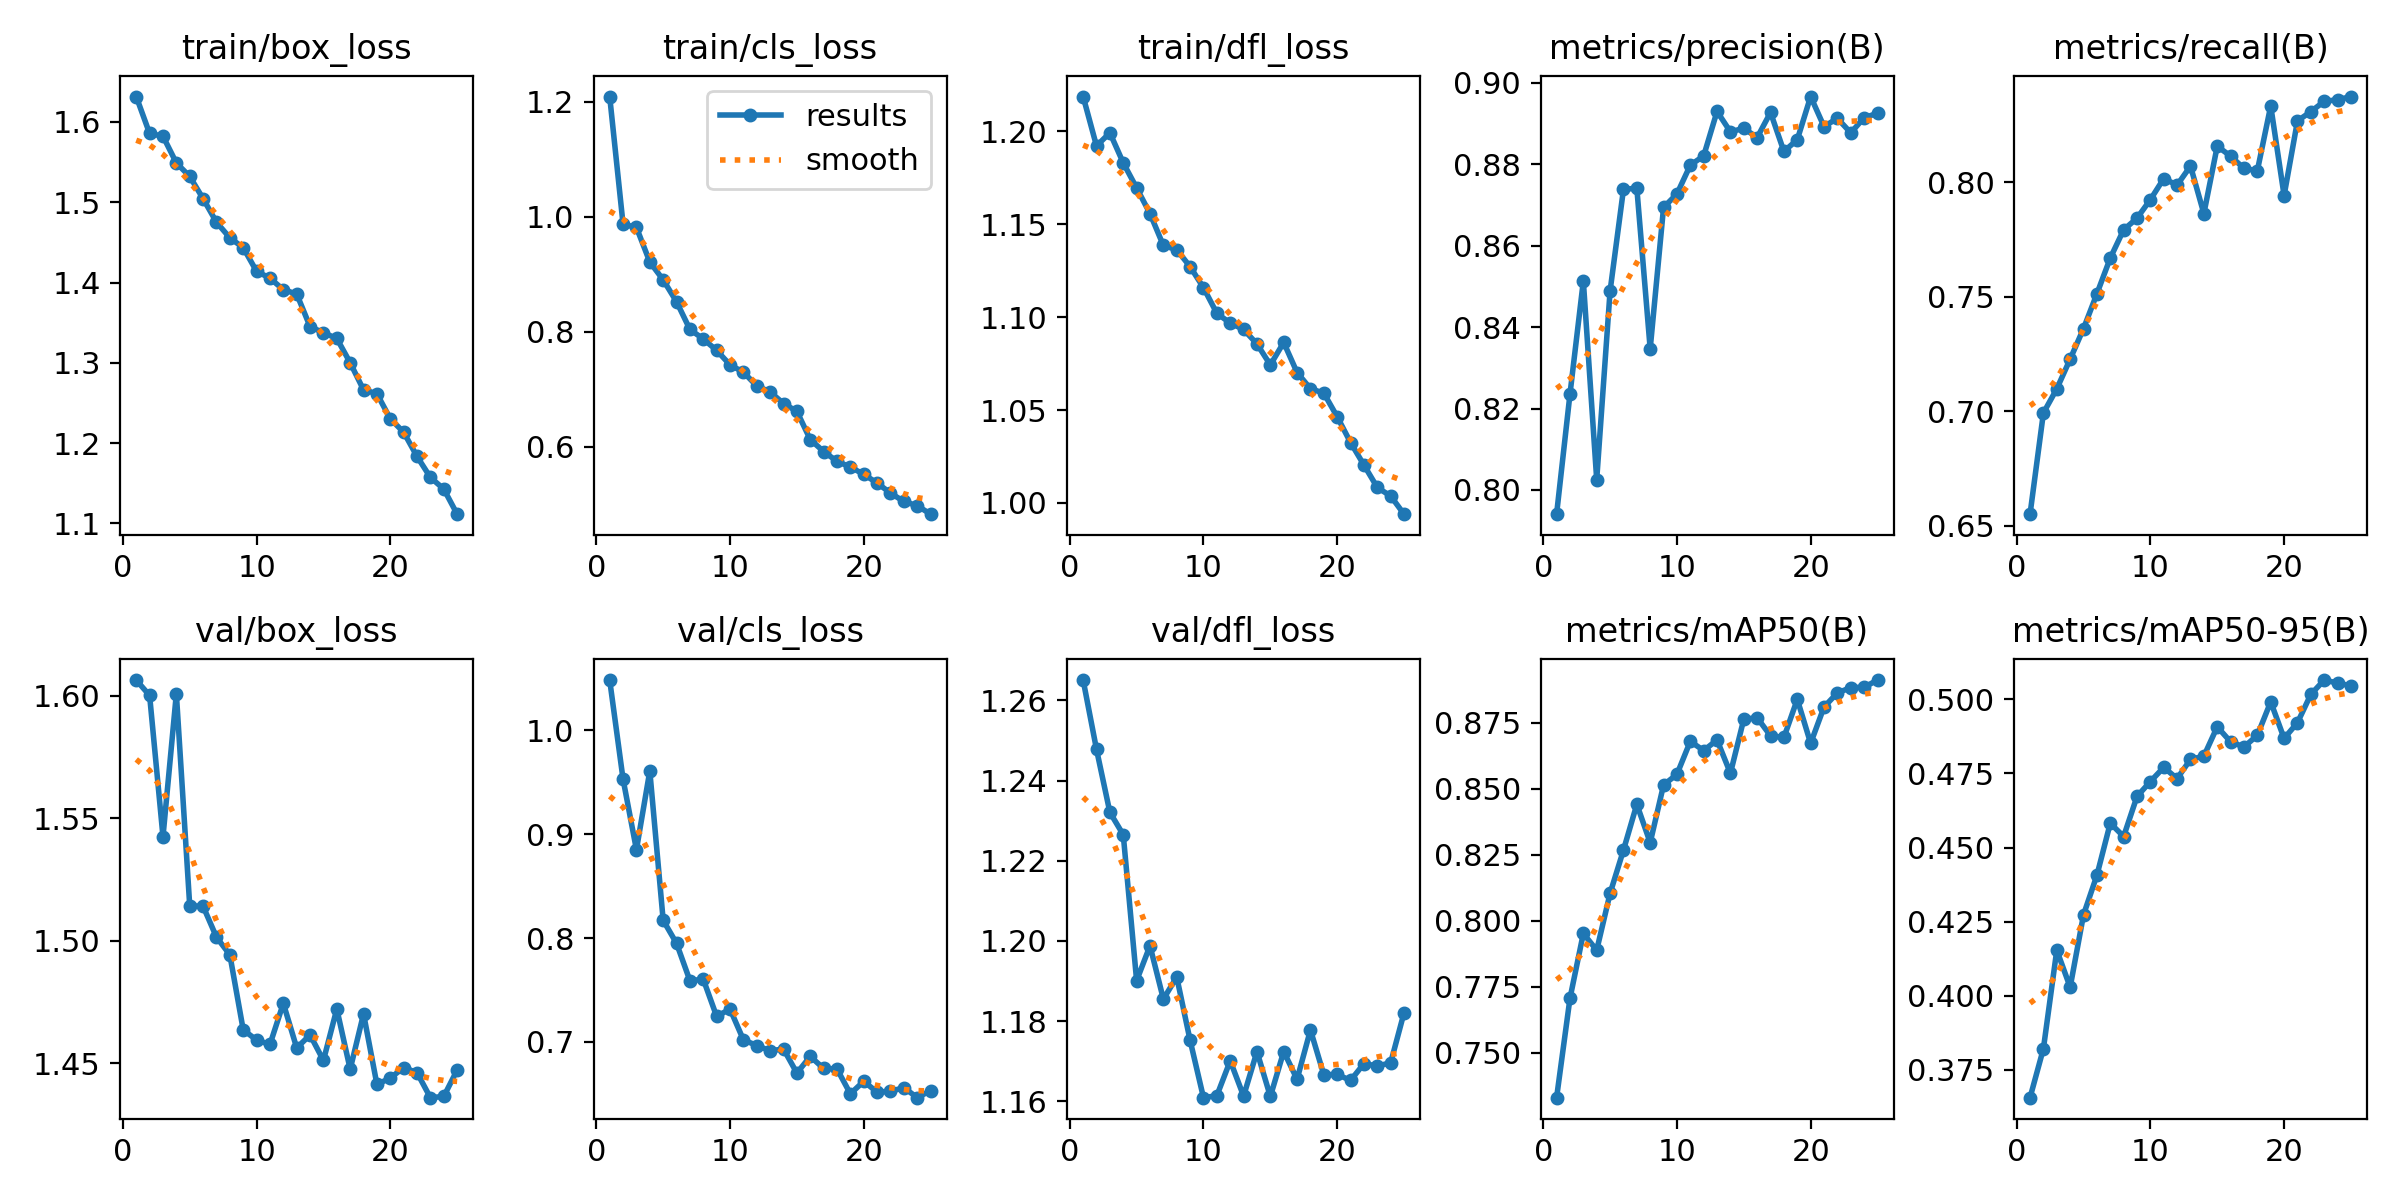

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


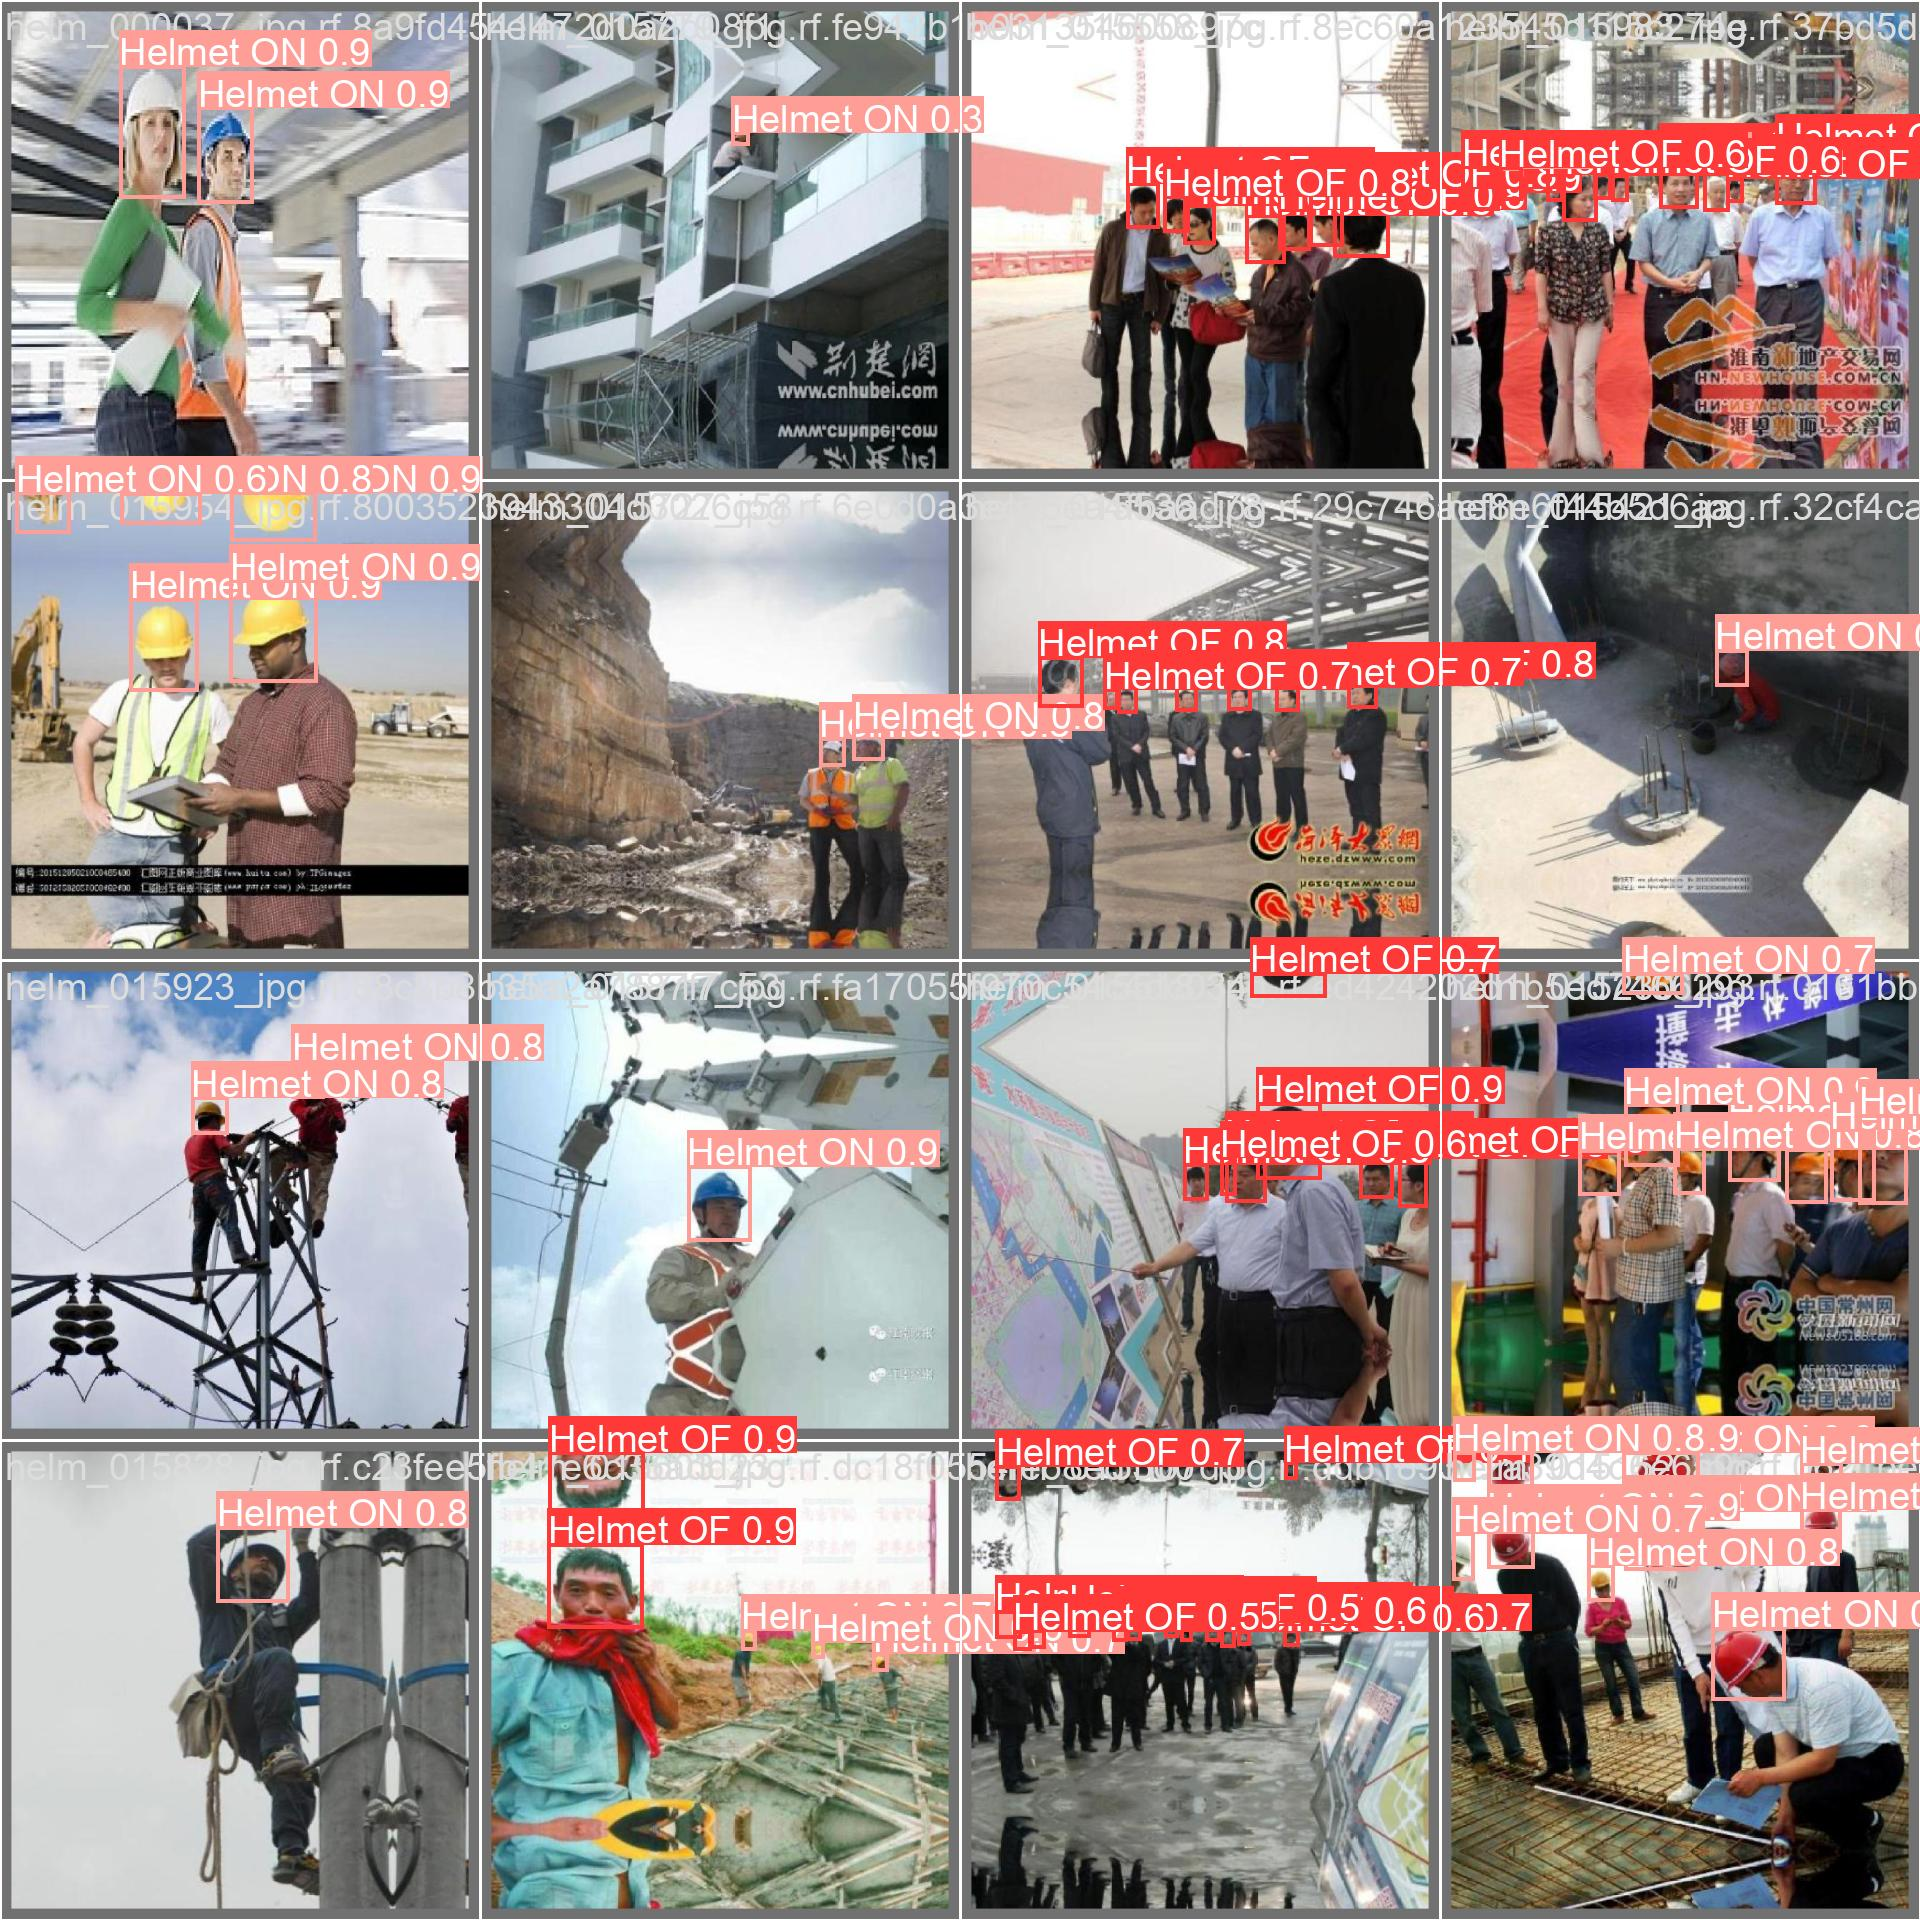

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [11]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/helmet-2/valid/labels.cache... 452 images, 0 backgrounds, 0 corrupt: 100% 452/452 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 29/29 [00:11<00:00,  2.54it/s]
                   all        452       4432      0.888      0.836       0.89      0.507
             Helmet OF        452       3025      0.888       0.86      0.904      0.476
             Helmet ON        452       1407      0.889      0.812      0.876      0.538
Speed: 1.3ms preprocess, 9.5ms inference, 0.0ms loss, 2.6ms postpr

## Inference with Custom Model

In [14]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/istockphoto-1389916964-640_adpp_is.mp4 save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (1/540) /content/istockphoto-1389916964-640_adpp_is.mp4: 384x640 1 Helmet ON, 111.3ms
video 1/1 (2/540) /content/istockphoto-1389916964-640_adpp_is.mp4: 384x640 1 Helmet ON, 10.7ms
video 1/1 (3/540) /content/istockphoto-1389916964-640_adpp_is.mp4: 384x640 1 Helmet ON, 10.6ms
video 1/1 (4/540) /content/istockphoto-1389916964-640_adpp_is.mp4: 384x640 1 Helmet ON, 10.6ms
video 1/1 (5/540) /content/istockphoto-1389916964-640_adpp_is.mp4: 384x640 1 Helmet ON, 10.6ms
video 1/1 (6/540) /content/istockphoto-1389916964-640_adpp_is.mp4: 384x640 1 Helmet ON, 10.6ms
video 1/1 (7/540) /content/istockphoto-1389916964-640_adpp_is.mp4: 384x640 1 Helmet ON, 10.6ms
video 1/1 (8/540) /content/istockphoto-1389916964-640_adpp_is.mp4: 384x640 1 Helmet ON, 10.6ms
video 1/1 (9/540) /content/istockphoto-1389916964-640_adpp_i

In [15]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/istockphoto-1907049427-640_adpp_is.mp4 save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (1/375) /content/istockphoto-1907049427-640_adpp_is.mp4: 384x640 1 Helmet ON, 103.2ms
video 1/1 (2/375) /content/istockphoto-1907049427-640_adpp_is.mp4: 384x640 1 Helmet ON, 10.7ms
video 1/1 (3/375) /content/istockphoto-1907049427-640_adpp_is.mp4: 384x640 1 Helmet ON, 10.6ms
video 1/1 (4/375) /content/istockphoto-1907049427-640_adpp_is.mp4: 384x640 1 Helmet ON, 10.6ms
video 1/1 (5/375) /content/istockphoto-1907049427-640_adpp_is.mp4: 384x640 1 Helmet ON, 10.6ms
video 1/1 (6/375) /content/istockphoto-1907049427-640_adpp_is.mp4: 384x640 1 Helmet ON, 10.7ms
video 1/1 (7/375) /content/istockphoto-1907049427-640_adpp_is.mp4: 384x640 1 Helmet ON, 10.7ms
video 1/1 (8/375) /content/istockphoto-1907049427-640_adpp_is.mp4: 384x640 1 Helmet ON, 10.6ms
video 1/1 (9/375) /content/istockphoto-1907049427-640_adpp_i

In [12]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/istockphoto-1341335752-640_adpp_is.mp4 save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (1/496) /content/istockphoto-1341335752-640_adpp_is.mp4: 384x640 1 Helmet OF, 1 Helmet ON, 120.8ms
video 1/1 (2/496) /content/istockphoto-1341335752-640_adpp_is.mp4: 384x640 1 Helmet OF, 1 Helmet ON, 10.5ms
video 1/1 (3/496) /content/istockphoto-1341335752-640_adpp_is.mp4: 384x640 1 Helmet OF, 2 Helmet ONs, 10.4ms
video 1/1 (4/496) /content/istockphoto-1341335752-640_adpp_is.mp4: 384x640 2 Helmet ONs, 10.4ms
video 1/1 (5/496) /content/istockphoto-1341335752-640_adpp_is.mp4: 384x640 2 Helmet ONs, 10.4ms
video 1/1 (6/496) /content/istockphoto-1341335752-640_adpp_is.mp4: 384x640 2 Helmet ONs, 10.4ms
video 1/1 (7/496) /content/istockphoto-1341335752-640_adpp_is.mp4: 384x640 2 Helmet ONs, 10.4ms
video 1/1 (8/496) /content/istockphoto-1341335752-640_adpp_is.mp4: 384x640 1 Helmet OF, 2 Helmet ONs, 11.6ms
vi

In [16]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/pngtree-worker-getting-ready-male-helmet-dark-photo-image_144713.jpg save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/pngtree-worker-getting-ready-male-helmet-dark-photo-image_144713.jpg: 640x448 1 Helmet ON, 140.0ms
Speed: 9.8ms preprocess, 140.0ms inference, 501.4ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [32]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/pexels-aleksey-2053893-3680959.jpg save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/pexels-aleksey-2053893-3680959.jpg: 448x640 3 Helmet ONs, 72.3ms
Speed: 4.1ms preprocess, 72.3ms inference, 618.4ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [35]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/Ekran_Alıntısı.PNG save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/Ekran_Alıntısı.PNG: 640x640 1 Helmet OF, 1 Helmet ON, 16.3ms
Speed: 4.7ms preprocess, 16.3ms inference, 548.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict6
💡 Learn more at https://docs.ultralytics.com/modes/predict


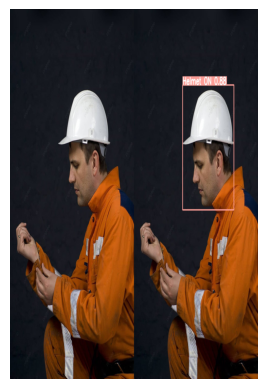

In [54]:
import matplotlib.pyplot as plt
import cv2
image1 = cv2.imread("/content/pngtree-worker-getting-ready-male-helmet-dark-photo-image_144713.jpg")
image2 = cv2.imread("/content/runs/detect/predict4/pngtree-worker-getting-ready-male-helmet-dark-photo-image_144713.jpg")

# Resimleri yan yana yerleştir
combined_image = cv2.hconcat([image1, image2])

combined_image = cv2.resize(combined_image,(1920,2868))

plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Eksenleri kapat
plt.show()

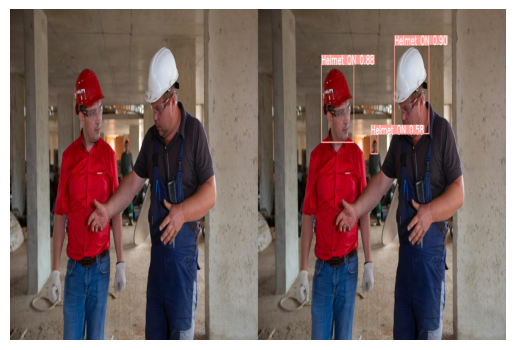

In [53]:
import cv2
import matplotlib.pyplot as plt

# Resimleri yükleyin
image1 = cv2.imread("/content/pexels-aleksey-2053893-3680959.jpg")
image2 = cv2.imread("/content/runs/detect/predict5/pexels-aleksey-2053893-3680959.jpg")
combined_image = cv2.hconcat([image1, image2])


combined_image = cv2.resize(combined_image,(2584,1723))

plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Eksenleri kapatın
plt.show()



# Resimleri yan yana yerleştirin





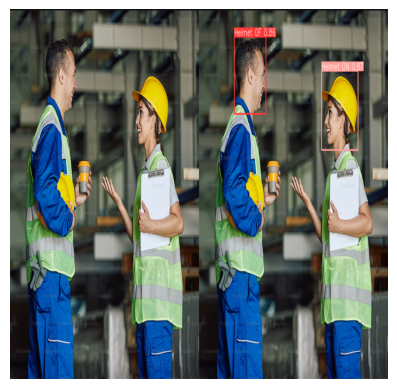

In [52]:
import cv2
import matplotlib.pyplot as plt

# Resimleri yükleyin
image1 = cv2.imread("/content/Ekran_Alıntısı.PNG")
image2 = cv2.imread("/content/runs/detect/predict6/Ekran_Alıntısı.PNG")

# Resimleri yan yana yerleştirin
combined_image = cv2.hconcat([image1, image2])

# Resmi gösterin
combined_image = cv2.resize(combined_image,(1534,1500))
plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Eksenleri kapatın
plt.show()


**NOTE:** Let's take a look at few results.

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.